# aStar Algo 1st lab program

##  A* Search Algorithm Implementation

The code provided is an implementation of the A* (A-star) search algorithm. A* is a pathfinding algorithm used to find the shortest path between two nodes in a graph. In this code, it finds the shortest path from a starting node 'S' to a destination node 'G' in a graph represented by the 'Graph_nodes' dictionary. Let me explain the code step by step:

## 1. Initialize necessary data structures and variables:

- `open_set`: A set to keep track of nodes that are candidates for further exploration.
- `closed_set`: A set to store nodes that have already been evaluated.
- `g`: A dictionary to store the cost of getting from the start node to a particular node.
- `parents`: A dictionary to store the parent node for each node, which helps reconstruct the path once the destination is reached.
- Initialize `g[start_node]` with 0 and `parents[start_node]` with `start_node`.

## 2. Perform the A* algorithm:

The main loop runs while the `open_set` is not empty, which means there are nodes to explore.

a. Find the node in the `open_set` with the lowest cost:

   - This is done in the following code block:

     ```python
     n = None
     for v in open_set:
         if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
             n = v
     ```

b. Check if the current node `n` is the destination (`stop_node`) or if it doesn't exist in the graph. If so, continue to the next iteration.

c. For each neighbor `m` of the current node `n` and the corresponding edge weight:

   - If `m` is not in the `open_set` and not in the `closed_set`, add it to the `open_set`, set its parent as `n`, and update the cost `g[m]`.
   - If `m` is in the `open_set` or `closed_set`, check if the path to `m` through the current node `n` is shorter than its previous recorded cost. If it is shorter, update the parent and cost accordingly. If `m` was in the `closed_set`, move it back to the `open_set` because it needs further exploration.

d. If `n` is still `None` after exploring neighbors, it means that no path exists from the start node to the destination. In this case, print "Path doesn't exist" and return `None`.

e. If the current node `n` is the destination (`stop_node`), reconstruct the path by backtracking through the `parents` dictionary and then print the path. Finally, return the path.

## 3. After the main loop completes, if no path was found, print "Path does not exist" and return `None`.

## 4. The `get_neighbour` function returns the neighbors of a given node `v` as specified in the `Graph_nodes` dictionary.

## 5. The `heuristic` function provides a heuristic value for a node `n` based on the `H_dist` dictionary. This value is used to guide the search in the most promising direction. In A*, a good heuristic should never overestimate the true cost to reach the destination.

## 6. The `Graph_nodes` dictionary represents the graph with nodes as keys and a list of their neighbors with associated edge weights.

To use this code, you can call `aStarAlgo('S', 'G')` to find the shortest path from node 'S' to 'G' in the provided graph.


## CODE

In [ ]:
def aStarAlgo(start_node, stop_node):
    open_set = set(start_node)
    closed_set = set()

    g= {}
    parents = {}
    g[start_node] = 0
    parents[start_node] = start_node

    while(len(open_set) > 0):
        n = None

        for v in open_set:
            if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n =v
        if n == stop_node or Graph_nodes[n] == None:
            pass
        else:
            for(m, weight) in get_neigthbour(n):

                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m]=g[n] + weight
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)


        if n == None:
            print("dosen't exit")
            return None
        if n == stop_node:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start_node)
            path.reverse()
            print('path found: {} '.format(path))
            return path
        open_set.remove(n)
        closed_set.add(n)
    print('Path does not exit')
    return None

def get_neigthbour(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

def heuristic(n):
    H_dist = {
        'S' : 14,
        'B' : 12,
        'C' : 11,
        'D' : 6,
        'E' : 11,
        'F' : 4,
        'G' : 0,
    }
    return H_dist[n]

Graph_nodes = {
    'S' : [('B', 4), ('C', 3)],
    'B' : [('F', 5), ('E', 12)],
    'C' : [('D', 7), ('E', 10)],
    'D' : [('E', 2)],
    'F' : [('G', 16)],
    'E' : [('G', 5)],
}

aStarAlgo('S', 'G')

path found: ['S', 'C', 'D', 'E', 'G'] 


['S', 'C', 'D', 'E', 'G']



---



#Candidate Elimination

This code is an implementation of the Candidate Elimination algorithm, which is used for machine learning and concept learning. The algorithm tries to learn a hypothesis that best fits the given data.

```python
import numpy as np
import pandas as pd
```

These lines import two Python libraries, NumPy and Pandas, which are used for data manipulation.

```python
data = pd.DataFrame(data = pd.read_csv('Dataset-CandidateElemination.csv'))
```

This line loads a dataset from a CSV file named 'Dataset-CandidateElemination.csv' into a Pandas DataFrame, which is like a table for data.

```python
concepts = np.array(data.iloc[:, 0 : -1])
```

Here, the code takes all the rows and all columns except the last one from the DataFrame and stores them in a variable called `concepts`. These are the features of the data that we want to use for learning.

```python
target = np.array(data.iloc[:, -1])
```

This line extracts the last column from the DataFrame, which represents the target or the thing we want to learn or predict. It's stored in a variable called `target`.

```python
def learn(concepts, target):
```

This part defines a function called `learn`, which takes two inputs: `concepts` and `target`. The purpose of this function is to learn and update specific and general hypotheses based on the input data.

```python
    specific_h=['0'] * l
    general_h = ['?']*l
```

Here, two lists, `specific_h` and `general_h`, are created. They are initialized with some default values ('0' and '?'). These lists represent the specific and general hypotheses.

```python
    specific_h = concepts[0].copy()
```

The code updates `specific_h` with the values from the first row of the `concepts` data. It's like starting with an initial guess based on the first example in the data.

```python
    general_h = [['?' for i in range(len(specific_h))] for i in range(len(specific_h))]
```

The `general_h` is initialized as a table of question marks. It's a more general guess and can be updated as we learn more.

The next part of the code is inside a loop. This loop goes through each example in the data and updates the hypotheses based on whether the example is positive (Yes) or negative (No).

```python
    for i, h in enumerate(concepts):
```

The loop goes through each row (example) in the `concepts` data.

```python
        if target[i] == "Yes":
```

This part checks if the target for the current example is "Yes." If it is, it means the example is a positive example.

```python
            for x in range(len(specific_h)):
```

It then goes through each feature (x) in the specific hypothesis.

```python
                if h[x] != specific_h[x]:
```

This condition checks if the feature in the current example is different from the feature in the specific hypothesis. If it's different, it means we need to update our hypothesis.

```python
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
```

If the feature is different, we update the specific hypothesis and general hypothesis to include a question mark ('?'), which means we don't know what that feature should be.

The code then checks if the target is "No" for negative examples and updates the hypotheses accordingly.

After each update, the code prints the current state of the hypotheses.

Finally, the code finds and removes any rows in the general hypothesis that contain all question marks ('?'). These rows represent completely unchanged parts of the general hypothesis.

The code returns the final specific and general hypotheses, which represent what the algorithm has learned from the data.

```python
s_final, g_final = learn(concepts, target)
```

Here, the `learn` function is called with the `concepts` and `target` data, and the final specific and general hypotheses are assigned to `s_final` and `g_final`.

```python
print('\n Final Specific_h: ', s_final, sep='\n')
print('\n Final General_h: ' , g_final, sep='\n' )
```

Finally, the code prints the final specific and general hypotheses to see what the algorithm has learned.

## Explanation
Importing Required Libraries
1. `import numpy as np`: Import the NumPy library, commonly used for numerical operations, and give it the alias 'np'.
2. `import pandas as pd`: Import the Pandas library, used for data manipulation and analysis, and give it the alias 'pd'.

### Loading Data from CSV
```bash
4. `data = pd.DataFrame(data = pd.read_csv('Dataset-CandidateElemination.csv')`:
```
 Read data from a CSV file named 'Dataset-CandidateElemination.csv' and create a Pandas DataFrame named 'data' to store it. This assumes the CSV file is in the same directory as the script.


### Extracting Feature Data
7. ```
concepts = np.array(data.iloc[:, 0 : -1])
```: Extract the feature data from the 'data' DataFrame and convert it into a NumPy array named 'concepts'. It selects all rows and all columns except the last one (-1).

### Extracting Target Data
 ```bash
10. target = np.array(data.iloc[:, -1]):
 ```
  Extract the target data (the last column) from the 'data' DataFrame and store it in a NumPy array named 'target'.

### Defining the Learning Function
12.

```
def learn(concepts, target):
```
: Define a Python function called 'learn' that takes two arguments, 'concepts' and 'target'. This function will implement the Candidate Elimination algorithm.

### Initializing Specific and General Hypotheses


15.
```
print("initialization of specific_h and general_h")
```
 Print a message indicating the initialization of 'specific_h' and 'general_h'. This is for informative purposes.

17.
```
l = len(concepts[0])
```
: Calculate the length of a single concept instance (assuming all instances have the same length).

18. ```specific_h = ['0'] * l```
: Initialize 'specific_h' as a list of '0's with a length of 'l'.

19. ```general_h = ['?'] * l```
: Initialize 'general_h' as a list of '?' symbols with a length of 'l'.

### Further Initializing General Hypothesis as a List of Lists
22. ```general_h = [['?' for i in range(len(specific_h))] for i in range(len(specific_h))]```: Transform 'general_h' into a list of lists. Each inner list is initialized with '?' values and has the same length as 'specific_h'. This will be used to track general hypotheses.

### Main Learning Loop
27. ```for i, h in enumerate(concepts):```: Start a loop over the instances in 'concepts' where 'i' is the index and 'h' is an individual concept instance.

30. ```if target[i] == "Yes":```: Check if the target for the current instance is "Yes." If the target is positive, the following code will be executed.

31. ```for x in range(len(specific_h)):```: Start a nested loop that iterates over the elements (features) of 'specific_h'.

33. ```if h[x] != specific_h[x]:```: Check if the feature value in the current concept instance 'h' does not match the corresponding value in 'specific_h'.

34. ```specific_h[x] = '?'```: If there's a mismatch, set 'specific_h[x]' to '?' to generalize.

35. ```general_h[x][x] = '?'```: Set 'general_h[x][x]' to '?' to be more specific in that dimension.

### Handling Instances with Negative Target
The code then proceeds to handle instances where the target is "No" (not shown here), and it follows a similar logic but updates 'general_h' instead.

### Printing Current Hypotheses
39-44. The subsequent lines print the current state of 'specific_h' and 'general_h' after each iteration in the loop.

### Removing Unchanged Rows in General Hypothesis
46. ```indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]```: Create a list 'indices' containing the indices of rows in 'general_h' where all values are '?' (representing unchanged hypotheses).

48. ```for i in indices:```: Start a loop over the indices of rows to be removed.

49. ```general_h.remove(['?', '?', '?', '?', '?', '?'])```: In this line, remove the rows in 'general_h' that match the pattern of all '?' values, effectively removing unchanged rows.

### Returning Final Hypotheses
53. ```return specific_h, general_h```: The function returns the final 'specific_h' and 'general_h' after the learning process.

### Calling the Learning Function
56. ```s_final, g_final = learn(concepts, target)```: Call the 'learn' function with 'concepts' and 'target' as input and store the returned 'specific_h' in 's_final' and 'general_h' in 'g_final'.

### Printing Final Hypotheses
59. ```print('\n Final Specific_h: ', s_final, sep='\n')```: Print the final 'specific_h' with a newline character separator.
60. ```print('\n Final General_h: ' , g_final, sep='\n' )```: Print the final 'general_h' with a newline character separator.

This code implements the Candidate Elimination algorithm to learn specific and general hypotheses based on a dataset. It iteratively refines the hypotheses as it processes each instance in the dataset. The 'specific_h' hypothesis becomes more specific when the target is 'No,' and 'general_h' becomes more general when the target is 'Yes.'


Certainly, I'll explain the `learn` function step by step. This function implements the Candidate Elimination algorithm, which learns specific and general hypotheses from a dataset. Here's a breakdown of the `learn` function:

```python
def learn(concepts, target):
```

This line defines a Python function called `learn` that takes two arguments: `concepts` and `target`. `concepts` are the input features, and `target` is the corresponding output labels.

```python
    print("initialization of specific_h and general_h")
```

This line prints a message indicating the initialization of `specific_h` and `general_h`, which are the specific and general hypotheses.

```python
    l = len(concepts[0])
```

This line calculates the number of features in the `concepts` by taking the length of the first row (example) in the `concepts` array and stores it in the variable `l`.

```python
    specific_h = ['0'] * l
    general_h = ['?'] * l
```

Here, `specific_h` is initialized as a list of '0' values with a length of `l`, and `general_h` is initialized as a list of '?' values with the same length. These lists will represent our initial hypotheses.

```python
    specific_h = concepts[0].copy()
```

This line updates the `specific_h` with the feature values from the first row of the `concepts`. It initializes the `specific_h` based on the first example.

```python
    general_h = [['?' for i in range(len(specific_h))] for i in range(len(specific_h))]
```

`general_h` is initialized as a list of lists containing '?' values. Each inner list has the same length as `specific_h`, and the outer list is a copy of these inner lists. This initializes `general_h` as a table of question marks.

The code then enters a loop that iterates through the examples in the `concepts` dataset:

```python
    for i, h in enumerate(concepts):
```

The loop iterates through each row of `concepts`, and `i` keeps track of the index, while `h` represents the current example.

```python
        if target[i] == "Yes":
```

This condition checks if the target for the current example is "Yes," meaning it's a positive example.

```python
            for x in range(len(specific_h)):
```

It enters a nested loop to iterate over each feature (`x`) in the `specific_h` and `general_h`.

```python
                if h[x] != specific_h[x]:
```

This condition checks if the feature in the current example (`h[x]`) is different from the corresponding feature in the `specific_h`. If they are different, it means that we need to update our hypotheses.

```python
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
```

If the feature is different, it updates both the specific hypothesis (`specific_h`) and the general hypothesis (`general_h`). It sets these features to '?', indicating that we don't know the correct values for them.

The code then checks if the target is "No" for negative examples and updates the hypotheses accordingly:

```python
        if target[i] == "No":
```

This condition checks if the target for the current example is "No," indicating it's a negative example.

```python
            for x in range(len(specific_h)):
```

It enters a loop similar to the previous one, iterating over each feature.

```python
                if h[x] != specific_h[x]:
```

This condition checks if the feature in the current example (`h[x]`) is different from the corresponding feature in the `specific_h`.

```python
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
```

If the features are different, it updates the `general_h` to match the `specific_h` for that feature. If the features are the same, it sets the value in `general_h` to '?' to indicate uncertainty.

The code prints the current state of the hypotheses at each step of the loop:

```python
        print('Steps', i + 1, 'of the Candidate Elimination Algorithm')
        print('Specific_h:', specific_h)
        print('General_h:', general_h)
```

This helps you track how the hypotheses are changing with each example.

After the loop, the code finds and removes any rows in the `general_h` that contain all question marks ('?'):

```python
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
```

This line finds the indices of rows in `general_h` where all elements are '?'.

```python
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
```

It removes these rows from the `general_h`. These rows represent unchanged parts of the general hypothesis.

The function then returns the final specific and general hypotheses:

```python
    return specific_h, general_h
```

These are the hypotheses that the algorithm has learned based on the input data.

Finally, the following lines outside the function call the `learn` function with the `concepts` and `target` data and print the final hypotheses:

```python
s_final, g_final = learn(concepts, target)
print('\nFinal Specific_h:', s_final, sep='\n')
print('\nFinal General_h:', g_final, sep='\n')
```

These lines store the final specific and general hypotheses in `s_final` and `g_final` and then print them to see what the algorithm has learned from the data.

## CODE

In [ ]:
import numpy as np
import pandas as pd

# Loading data from a csv file
data = pd.read_csv('tennis.csv')

# print(data)

# seperating concepts feature from target
concepts = np.array(data.iloc[:, 0 : -1])
# print(concepts)

# isolating target into a separate dataFrame
# copying last column to target array
target = np.array(data.iloc[:, -1])
# print(target)

def learn(concepts, target):
    # initialize S0 with the first instace from concept
    # .copy() make sure a new list is created instead of pointing to the  same memory

    print("initialization of specific_h and general_h")
    l = len(concepts[0])
    specific_h=['0'] * l
    # print(specific_h)
    general_h = ['?']*l
    # print(general_h)
    specific_h = concepts[0].copy()
    # print('Initialization of specific_h and general_h)
    # print(specific_h)

    general_h = [['?' for i in range(len(specific_h))] for i in range(len(specific_h))]
    # print(general_h)
    # The learning iteration


    for i, h in enumerate(concepts):
        # checking if the hypothesis has a positive target
        if target [i] == "Yes":
            for x in range(len(specific_h)):
                # change the values in S and G only if value chnages
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        # checking if the hypothesis has a positive target

            for x in range(len(specific_h)):
               if target[i] == "No":
        # For negative hypothsis change values only in G
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
        print('\n\nSteps' , i+1 , 'of candidate Elimination Algorithm')
        print(specific_h)
        print(general_h)
    # Find indices where we have empty rows, meaning those that are unchnaged

    indices = [i for i, val in enumerate(general_h) if val==['?', '?', '?', '?', '?','?']]
    for i in indices:
        # Remove those rows from general_h
        general_h.remove(['?', '?', '?', '?', '?', '?'])
        # Return final value
    return specific_h, general_h

s_final, g_final = learn(concepts, target)
print('\n Final Specific_h: ', s_final, sep='\n')
print('\n Final General_h: ' , g_final, sep='\n' )

initialization of specific_h and general_h


Steps 1 of candidate Elimination Algorithm
['sunny' 'hot' 'high' 'weak']
[['?', '?', '?', '?'], ['?', '?', '?', '?'], ['?', '?', '?', '?'], ['?', '?', '?', '?']]


Steps 2 of candidate Elimination Algorithm
['sunny' 'hot' 'high' 'weak']
[['?', '?', '?', '?'], ['?', '?', '?', '?'], ['?', '?', '?', '?'], ['?', '?', '?', '?']]


Steps 3 of candidate Elimination Algorithm
['sunny' 'hot' 'high' 'weak']
[['?', '?', '?', '?'], ['?', '?', '?', '?'], ['?', '?', '?', '?'], ['?', '?', '?', '?']]


Steps 4 of candidate Elimination Algorithm
['sunny' 'hot' 'high' 'weak']
[['?', '?', '?', '?'], ['?', '?', '?', '?'], ['?', '?', '?', '?'], ['?', '?', '?', '?']]


Steps 5 of candidate Elimination Algorithm
['sunny' 'hot' 'high' 'weak']
[['?', '?', '?', '?'], ['?', '?', '?', '?'], ['?', '?', '?', '?'], ['?', '?', '?', '?']]


Steps 6 of candidate Elimination Algorithm
['sunny' 'hot' 'high' 'weak']
[['?', '?', '?', '?'], ['?', '?', '?', '?'], ['?', '?', '?', '



---



# A0* algorithm

##  explanation
## Class Definition: Graph


```python

class Graph:

def \_\_init\_\_(self, graph, heuristicNodeList, startNode):

self.graph = graph

self.H = heuristicNodeList

self.start = startNode

self.parent =  {}

self.status = {}

self.solutionGraph = {}
```

The program defines a class called Graph. This class is used to implement the AO (AO* star) algorithm on a given graph. The class has several instance variables, including graph (the graph data), H (heuristic values for nodes), start (the starting node), parent (to store parent-child relationships), status (to keep track of node status), and solutionGraph (to store the resulting solution graph).

# Method: applyAoStar

```python

def applyAoStar(self):

self.aoStar(self.start, False)
```

applyAoStar is a method that initiates the AO * algorithm. It starts the algorithm by calling the aoStar method with the starting node and a flag set to False.

# Method: getNeighbors

```python

def getNeighbors(self, v):

return self.graph.get(v, '')
```

getNeighbors is a method that returns the neighbors of a given node v from the graph. It uses the get method to retrieve the neighbors of the node.

# Method: getStatus

```python

def getStatus(self, v):

return self.status.get(v, 0)
```

getStatus is a method that returns the status of a given node v from the status dictionary. If the status is not found, it returns 0.

# Method: setStatus

```python

def setStatus(self, v, val):

self.status[v] = val
```
setStatus is a method to set the status of a given node v to the provided value val. It updates the status dictionary.

# Method: getHeuristicNodeValue

```python

def getHeuristicNodeValue(self, n):

return self.H.get(n, 0)
```
getHeuristicNodeValue is a method that returns the heuristic value of a given node n from the H dictionary. If the value is not found, it returns 0.

# Method: setHeuristicNodeValue

```python

def setHeuristicNodeValue(self, n, value):

self.H[n] = value
```
setHeuristicNodeValue is a method to set or update the heuristic value of a given node n to the provided value. It updates the H dictionary.

# Method: printSolution

```python

def printSolution(self):

print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE START NODE:", self.start)

print("--------------------------------------------")

print(self.solutionGraph)

print("------------------------------------------")
```
printSolution is a method to print the solution graph. It displays a message indicating that you should traverse the graph from the start node and then prints the solution graph.

# Method: computeMinimumCostChildNode

```python

def computeMinimumCostChildNode(self, v):

minimumCost = 0

costToChildNodeListDict = {}

costToChildNodeListDict[minimumCost] = []

flag = True

for nodeInfoTupleList in self.getNeighbors(v):

cost = 0

nodeList = []

for c, weight in nodeInfoTupleList:

cost = cost + self.getHeuristicNodeValue(c) + weight

nodeList.append(c)

if flag == True:

minimumCost = cost

costToChildNodeListDict[minimumCost] = nodeList

flag = False

else:

if minimumCost > cost:

minimumCost = cost

costToChildNodeListDict[minimumCost] = nodeList

return minimumCost, costToChildNodeListDict[minimumCost]
```
computeMinimumCostChildNode is a method that calculates the minimum cost and the corresponding child nodes for a given node v. It iterates through the neighbor nodes, computes the cost of reaching each neighbor, and keeps track of the minimum cost and associated child nodes.

# Method: aoStar

```python

def aoStar(self, v, backTracking):

print("HEURISTIC VALUES: " , self.H)

print("SOLUTION GRAPH: " ,self.solutionGraph)

print("PROCESSING NODE: ", v)

print("------------------------------------------")
```
aoStar is the main AO\* algorithm method. It takes a node v and a backTracking flag as arguments. This method is used recursively to process nodes in the graph.

## If Condition

```python

if self.getStatus(v) >= 0:
```
This if condition checks whether the status of the current node v is greater than or equal to 0. If the status is non-negative, it means the node is not yet solved.

Minimum Cost Calculation

```python

minimumCost, childNodeList = self.computeMinimumCostChildNode(v)

self.setHeuristicNodeValue(v, minimumCost)

self.setStatus(v, len(childNodeList))

solved = True
```
Inside the if block, the program calculates the minimum cost and associated child nodes using the computeMinimumCostChildNode method. It updates the heuristic value of the current node with the minimum cost and sets its status to the number of child nodes. It also initializes a solved flag as True.

## Loop Over Child Nodes

```python

for childNode in childNodeList:

self.parent[childNode] = v

if self.getStatus(childNode) != -1:

solved = solved & False
```
The program iterates over the child nodes and establishes parent-child relationships by updating the self.parent dictionary. It checks if the status of child nodes is not -1, indicating that they are not yet solved. If any child node is not solved, the solved flag is set to False.

## Solved Check

```python

if solved == True:

self.setStatus(v, -1)

self.solutionGraph[v] = childNodeList
```
After processing all child nodes, the program checks if all child nodes have been solved (i.e., solved is True). If they are, it sets the status of the current node v to -1, indicating it is solved, and updates the solution graph with the child nodes.

# Backtracking

```python

if v != self.start:

self.aoStar(self.parent[v], True)
```
If the current node v is not the start node, the program initiates backtracking by calling aoStar with the parent of the current node and setting the backTracking flag to True.

Continue Exploring

```python

if backTracking == False:

for childNode in childNodeList:

self.setStatus(childNode, 0)

self.aoStar(childNode, False)
```
If backtracking is not in progress (i.e., backTracking is False), the program continues to explore the minimum cost child nodes. It resets the status of child nodes to 0 and calls aoStar` for each child node to further explore them.

## Initializations

```python

h1 = {'A' : 1, 'B' : 6, 'C': 2, 'D':12, 'E':2, 'F':1, 'G' : 5, 'H': 7, 'J': 1}

graph1 = {

'A' : [[('B', 1), ('C', 1)], [('D', 1)]],

'B' : [[('G', 1)], [('H', 1)]],

'C' : [[('J', 1)]],

'D' : [[('E' , 1), ('F', 1)]],

'G' : [[('I', 1)]]

}
```
These lines initialize the heuristic values in dictionary h1 and the graph in dictionary graph1.

## Object Creation

```python

G1 = Graph(graph1, h1, 'A')
```
An instance of the Graph class is created with the graph data from graph1, heuristic values from h1, and the starting node 'A'.

AO* Algorithm Execution

```python

G1.applyAoStar()
```
The applyAoStar method is called on the G1 object to start the AO\* algorithm.

## Solution Printing

```python
G1.printSolution()
```

Finally, the printSolution method is called to print the solution graph.

This Python program defines a class for implementing the AO\* algorithm, processes a specific graph, and prints the resulting solution graph. It is a heuristic search algorithm used to find the best path in a graph.


## CODE

In [ ]:
class Graph:
    def __init__(self, graph, heuristicNodeList, startNode): # instantiate graph
        self.graph = graph
        self.H = heuristicNodeList
        self.start = startNode
        self.parent =  {}
        self.status = {}
        self.solutionGraph = {}

    def applyAoStar(self): # start a recursice AO* algorithm
        self.aoStar(self.start, False)

    def getNeighbors(self, v): # get neighbour of a given node
        return self.graph.get(v, '')

    def getStatus(self, v): # return the status of a given node
        return self.status.get(v, 0)

    def setStatus(self, v, val): # set the status of a given node
        self.status[v] = val

    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0) # always return the heuristic value of a given node

    def setHeuristicNodeValue(self, n, value):
        self.H[n] = value # set the revised heuristic value of a given node

    def printSolution(self):
        print("FOR GRPAH SOLUTION, TRAVERSE THE GRAPH FROM THE STARTNODE:", self.start)
        print("--------------------------------------------")
        print(self.solutionGraph)
        print("------------------------------------------")


    def computeMinimumCostChildNode(self, v): # computes the minimum cost of the child node
        minimumCost = 0
        costToChildNodeListDict = {}
        costToChildNodeListDict[minimumCost] = []
        flag = True
        for nodeInfoTupleList in self.getNeighbors(v): # iterate over all the set
            cost = 0
            nodeList = []

            for c, weight in nodeInfoTupleList:
                cost = cost + self.getHeuristicNodeValue(c) + weight
                nodeList.append(c)
            if flag == True: # initialize minimum cost with the cost of first set of
                minimumCost = cost
                costToChildNodeListDict[minimumCost] = nodeList # set the Minimum cost
                flag = False
            else: # checking the minimum cost node with the current minimum vost
                if minimumCost > cost:
                    minimumCost = cost
                    costToChildNodeListDict[minimumCost] = nodeList # set the mium
        return minimumCost, costToChildNodeListDict[minimumCost] # return minimum

    def aoStar(self, v, backTracking): # Ao* algorithm for a start node and backTaack
        print("HEURISTIC VALUES: " , self.H)
        print("SOLUTION GRAPH: " ,self.solutionGraph)
        print("PROCeSSING NODE: ", v)
        print("------------------------------------------")

        if self.getStatus(v) >= 0:
                minimumCost, childNodeList = self.computeMinimumCostChildNode(v)
                self.setHeuristicNodeValue(v, minimumCost)
                self.setStatus(v, len(childNodeList))
                solved = True

                for childNode in childNodeList:
                    self.parent[childNode] = v
                    if self.getStatus(childNode) != -1:
                        solved = solved & False
                if solved == True: # if the minum cost nodes of v are solved set teh sovled as Terue
                    self.setStatus(v, -1)
                    self.solutionGraph[v] = childNodeList # update teh solution graph with childnode list

                if v != self.start: # check the current node ist he start node fro back
                    self.aoStar(self.parent[v], True) # backtracking the current node

                if backTracking == False: # check the current call is not for backtrack
                    for childNode in childNodeList: # for each minimum cost node to
                        self.setStatus(childNode, 0) # set the status of child node to 0
                        self.aoStar(childNode, False) # minimum cost child node is fulrthe explored


h1 = {'A' : 1, 'B' : 6, 'C': 2, 'D':12, 'E':2, 'F':1, 'G' : 5, 'H': 7, 'J': 1}
graph1 = {
        'A' : [[('B', 1), ('C', 1)], [('D', 1)]],
        'B' : [[('G', 1)], [('H', 1)]],
        'C' : [[('J', 1)]],
        'D' : [[('E' , 1), ('F', 1)]],
        'G' : [[('I', 1)]]
        }

G1 = Graph(graph1, h1, 'A')
G1.applyAoStar()
G1.printSolution()


HEURISTIC VALUES:  {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'J': 1}
SOLUTION GRAPH:  {}
PROCeSSING NODE:  A
------------------------------------------
HEURISTIC VALUES:  {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'J': 1}
SOLUTION GRAPH:  {}
PROCeSSING NODE:  B
------------------------------------------
HEURISTIC VALUES:  {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'J': 1}
SOLUTION GRAPH:  {}
PROCeSSING NODE:  A
------------------------------------------
HEURISTIC VALUES:  {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'J': 1}
SOLUTION GRAPH:  {}
PROCeSSING NODE:  G
------------------------------------------
HEURISTIC VALUES:  {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 1, 'H': 7, 'J': 1}
SOLUTION GRAPH:  {}
PROCeSSING NODE:  B
------------------------------------------
HEURISTIC VALUES:  {'A': 10, 'B': 2, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 1, 'H': 7, 'J': 1}
SOLUTION GRAPH:  {}
PR

# **Decision Tree**

yet to insert explanation


## explanation

```python
import pandas as pd
import math
import numpy as np
```

These lines import the necessary Python libraries: pandas for data manipulation, math for mathematical functions, and numpy for numerical operations.



``` data = pd.read_csv("tennis.csv")```

This line reads the data from a CSV file named "tennis.csv" using pandas and stores it in the variable data.

```python
features = [feat for feat in data]
features.remove("answer")
```

It creates a list of feature names by iterating through the columns in the dataset and removes the "answer" column from the list. These features will be used for building the decision tree.

```python
# Create a class named Node with four members
class Node:
    def __init__(self):
        self.children = []  # Initialize a list to store child nodes
        self.value = ""     # Initialize a value (feature or attribute)
        self.isLeaf = False  # Initialize a flag to indicate if it's a leaf node
        self.pred = ""       # Initialize a prediction (if it's a leaf node)

```

Here, a Python class named Node is defined. It represents a node in the decision tree. Each node has attributes for its children, the attribute value, a flag to indicate if its a leaf node, and a prediction.

```python
# Define a function named entropy to calculate the entropy of a set of examples
def entropy(examples):
    # Initialize counters for positive and negative examples to 0
    pos = 0.0
    neg = 0.0
    
    # Iterate through each row in the 'examples' DataFrame
    for _, row in examples.iterrows():
        # Check if the 'answer' column for the current example is "yes"
        if row["answer"] == "yes":
            # Increment the count of positive examples
            pos += 1
        else:
            # Increment the count of negative examples
            neg += 1

    # Check if there are no positive or no negative examples
    if pos == 0.0 or neg == 0.0:
        # If all examples are of one class, return an entropy of 0.0 (perfectly pure)
        return 0.0
    else:
        # Calculate the probabilities of positive (p) and negative (n) examples
        p = pos / (pos + neg)
        n = neg / (pos + neg)
        
        # Calculate the entropy using the formula for entropy
        entropy_value = -(p * math.log(p, 2) + n * math.log(n, 2))
        
        # Return the calculated entropy value
        return entropy_value

```

This function, entropy, calculates the entropy of a set of examples. It counts the number of positive ("yes") and negative ("no") answers in the dataset and computes the entropy using the formula for information entropy.

```python
# Define a function named info_gain to calculate the information gain of a given attribute
def info_gain(examples, attr):
    # Calculate the unique values of the specified attribute
    uniq = np.unique(examples[attr])
    
    # Calculate the entropy of the entire dataset using the 'entropy' function
    gain = entropy(examples)
    
    # Iterate through each unique value (u) of the attribute
    for u in uniq:
        # Create a subset of data where the attribute has the value 'u'
        subdata = examples[examples[attr] == u]
        
        # Calculate the entropy of the subset using the 'entropy' function
        sub_e = entropy(subdata)
        
        # Calculate the weighted entropy reduction and subtract it from the gain
        gain -= (float(len(subdata)) / float(len(examples))) * sub_e

    # Return the calculated information gain
    return gain

```

The info_gain function calculates the information gain for a given attribute. It first calculates the entropy of the entire dataset, then iterates through unique values of the attribute, calculating the entropy for each subset after splitting on that attribute, and subtracting the weighted average of entropies to get the information gain.

```python
# Define a function named ID3 to construct a decision tree for the given data
def ID3(examples, attrs):
    # Create the root node of the decision tree
    root = Node()
    
    # Initialize variables to track the maximum information gain and associated feature
    max_gain = 0
    max_feat = ""
    
    # Iterate through the available features (attributes)
    for feature in attrs:
        # Calculate the information gain for the current feature
        gain = info_gain(examples, feature)
        
        # Check if the information gain for this feature is greater than the current maximum
        if gain > max_gain:
            max_gain = gain
            max_feat = feature
            
    # Set the value of the root node to the feature with the maximum information gain
    root.value = max_feat
    
    # Calculate the unique values of the chosen feature
    uniq = np.unique(examples[max_feat])
    
    # Iterate through the unique values
    for u in uniq:
        # Create a subset of data where the chosen feature has the value 'u'
        subdata = examples[examples[max_feat] == u]
        
        # If the subset is pure (entropy is 0.0), create a leaf node
        if entropy(subdata) == 0.0:
            newNode = Node()
            newNode.isLeaf = True
            newNode.value = u
            newNode.pred = np.unique(subdata["answer"])
            root.children.append(newNode)
        else:
            # If the subset is not pure, create a dummy node
            dummyNode = Node()
            dummyNode.value = u
            
            # Copy the list of attributes and remove the feature used for splitting
            new_attrs = attrs.copy()
            new_attrs.remove(max_feat)
            
            # Recursively build the child nodes using the ID3 algorithm
            child = ID3(subdata, new_attrs)
            dummyNode.children.append(child)
            root.children.append(dummyNode)
    
    # Return the root of the decision tree
    return root

```

The ID3 function is an implementation of the ID3 decision tree algorithm. It recursively builds the decision tree. It starts with an empty root node and selects the attribute with the highest information gain as the current node. It then splits the data, creates child nodes for each unique attribute value, and continues the process recursively until it reaches a leaf node.


```python
# Define a function named printTree to print the decision tree
def printTree(root: Node, depth=0):
    # Indentation: Print a tab character for each level of depth
    for i in range(depth):
        print("\t", end="")

    # Print the value (feature) of the current node
    print(root.value, end="")

    # If the current node is a leaf node, print the prediction (class label)
    if root.isLeaf:
        print("->", root.pred)

    # Print a new line to separate tree nodes
    print()

    # Recursively print child nodes with increased depth
    for child in root.children:
        printTree(child, depth + 1)

```


The printTree function is used to print the decision tree in a structured format. It recursively traverses the tree, printing the attribute value and prediction for each node.

```python

# Define a function named classify to classify a new example using the decision tree
def classify(root: Node, new):
    # Iterate through the children of the current node
    for child in root.children:
        # Check if the value of the child node matches the value of the new example for the current feature
        if child.value == new[root.value]:
            # If the child node is a leaf node, print the prediction
            if child.isLeaf:
                print("Predicted Label for new example", new, "is:", child.pred)
                return
            else:
                # If the child node is not a leaf, recursively classify using its child node
                classify(child.children[0], new)

```

The classify function takes a new example and uses the decision tree to classify it. It traverses the tree based on the attribute values of the new example and prints the predicted label when it reaches a leaf node.

```python
root = ID3(data, features)
print("Decision tree is:")
printTree(root)
print("--------------")
new = {"outlook":"sunny","temperature":"hot", "humidity":"high", "wind":"strong"}
classify(root, new)
new1= {"outlook":"overcast","temperature":"hot", "humidity":"high", "wind":"strong"}
classify(root, new1)
```

Finally, the code creates the decision tree using the ID3 algorithm, prints the decision tree structure, and then classifies two new examples using the decision tree.

## CODE

In [ ]:
import pandas as pd
import math
import numpy as np

data = pd.read_csv("tennis.csv")
features = [feat for feat in data]
features.remove("answer")
# create a class named node with four memner childere

class Node:
    def __init__(self):
        self.children = []
        self.value = ""
        self.isLeaf  =  False
        self.pred = ""



# define a function called entropy to dfind the entropy

def entropy(examples):
    pos = 0.0
    neg = 0.0
    for _, row in examples.iterrows():
        if row["answer"] == "yes":
            pos += 1
        else :
            neg += 1


    if pos == 0.0 or neg == 0.0:
        return 0.0
    else:
        p = pos / (pos + neg)
        n = neg / (pos + neg)
        return - (p * math.log(p,2) + n* math.log(n,2))

# define the function named info_ggain to find the gain of the

def info_gain(examples, attr):
    uniq = np.unique(examples[attr])
    # print("\n", quiq)
    gain = entropy(examples)
    for u  in uniq:
        subdata = examples[examples[attr] == u]
        # print("\n", subdata)
        sub_e = entropy(subdata)
        gain -= (float(len(subdata))/ float(len(examples))) * sub_e
        # print("\n", gain)

    return gain

# define a function named ID3 to get the decisiontree for the given daqta

def ID3(examples, attrs):
    root = Node()

    max_gain = 0
    max_feat = ""
    for feature in attrs:
        gain = info_gain(examples, feature)
        if gain > max_gain:
            max_gain= gain
            max_feat  = feature


    root.value = max_feat
    # print(max feature attr)\

    uniq = np.unique(examples[max_feat])

    for u in uniq:
        subdata = examples[examples[max_feat] == u]
        if entropy(subdata) == 0.0:
            newNode = Node()
            newNode.isLeaf = True
            newNode.value  = u
            newNode.pred = np.unique(subdata["answer"])
            root.children.append(newNode)

        else:
            dummyNode = Node()
            dummyNode.value = u
            new_attrs = attrs.copy()
            new_attrs.remove(max_feat)
            child = ID3(subdata, new_attrs)
            dummyNode.children.append(child)
            root.children.append(dummyNode)
    return root

# define a funcitn named printTree to dreaw the decision tree

def printTree(root: Node, depth=0):
    for i in range(depth):
        print("\t", end="")
    print(root.value, end="")

    if root.isLeaf:
        print("->", root.pred)
    print()

    for child in root.children:
        printTree(child, depth + 1)

# define a funcitno named classify to classify the new example

def classify(root:Node, new):
    for child in root.children:
        if child.value == new[root.value]:
            if child.isLeaf:
                print("Predicted Label fornew example", new, "is:", child.pred)
                exit
            else:
                classify(child.children[0], new)

root = ID3(data, features)
print("Decision tree is:")
printTree(root)
print("--------------")
new = {"outlook":"sunny","temperature":"hot", "humidity":"high", "wind":"strong"}
classify(root, new)
new1= {"outlook":"overcast","temperature":"hot", "humidity":"high", "wind":"strong"}

classify(root, new1)

Decision tree is:
outlook
	overcast-> ['yes']

	rain
		wind
			strong-> ['no']

			weak-> ['yes']

	sunny
		humidity
			high-> ['no']

			normal-> ['yes']

--------------
Predicted Label fornew example {'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'high', 'wind': 'strong'} is: ['no']
Predicted Label fornew example {'outlook': 'overcast', 'temperature': 'hot', 'humidity': 'high', 'wind': 'strong'} is: ['yes']


**Program** 5

In [ ]:
import numpy as np

x = np.array(([2,9], [1,5], [3,6]), dtype=float)
y = np.array(([92], [86], [89]), dtype =float)

x = x/np.amax(x, axis=0)
y =y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))


def derivatives_sigmoid(x):
    return x*(1-x)

epoch = 500
lr = 0.1

inputlayer_neurons = 2
hiddenlayer_neurons = 3
outputlayer_neurons = 1


wb = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
bh = np.random.uniform(size =(1, hiddenlayer_neurons))

wout = np.random.uniform(size=(hiddenlayer_neurons, outputlayer_neurons))
bout = np.random.uniform(size=(1, outputlayer_neurons))


for i in range(epoch):
    hinp1=np.dot(x,wb)
    hinp=hinp1+bh
    hlayer_act = sigmoid(hinp)
    outinp1 = np.dot(hlayer_act, wout)
    outinp = outinp1 + bout
    output = sigmoid(outinp)

    EO = y - output
    outgrad = derivatives_sigmoid(output)
    d_output = EO*outgrad
    EH = d_output.dot(wout.T)

    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output)*lr
    wb += x.T.dot(d_hiddenlayer)*lr

print("Input\n" + str(x))
print("Acutual outpout: \n" + str(y))
print("predicted output: \n " +str( output))

# ANN

## Explanation

## code

In [ ]:
import numpy as np
X = np.array(([2,9], [1,5], [3,6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0)
y = y/100

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def derivatives_sigmoid(x):
    return x * (1-x)

epoch = 5000
lr=0.1

inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1

wh = np.random.uniform(size=(2,3))
bh = np.random.uniform(size=(1,3))
wout = np.random.uniform(size=(3,1))
bout = np.random.uniform(size=(1,1))

for i in range(epoch):
    hinp1=np.dot(X,wh)
    hinp=hinp1+bh
    hlayer_act=sigmoid(hinp)

    outinp1=np.dot(hlayer_act,wout)
    outinp=outinp1+bout
    output=sigmoid(outinp)

    EO=y-output
    outgrad=derivatives_sigmoid(output)
    d_output=EO*outgrad

    EH=d_output.dot(wout.T)
    hiddengrad=derivatives_sigmoid(hlayer_act)
    d_hiddenlayer=EH*hiddengrad

    wout+=hlayer_act.T.dot(d_output)*lr
    wh+=X.T.dot(d_hiddenlayer)*lr

print("Input : \n"+str(X))
print("Actual Output : \n"+str(y))
print("Predicted Output : \n",output)

Input : 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output : 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output : 
 [[0.89743992]
 [0.87369287]
 [0.8979083 ]]


# naiv bayesian

# New Section

## explanation

## code

In [ ]:
import csv
import random
import math

def loadcsv(filename):
    reader = csv.reader(open(filename))
    dataset = []
    for row in reader:
        inlist = []
        for i in range(len(row)):
            inlist.append(float(row[i]))
        dataset.append(inlist)
    return dataset


# splitting the dat aset into training set

def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)

    while (len(trainSet) < trainSize):
        index = random.randrange(len(copy)) # random index
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

# summarize data separate data by class
# Function to categorize the dataset in terms of classes

def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if(vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated



# caluclate themeand
    # the mean is the central middle or central tendency of the data
def mean(numbers):
    return sum(numbers) / float (len(numbers))

# standard deviation
def stdev(numbers):
    if len(numbers) == 0:
        return 0
    avg = mean(numbers)
    variance = sum([pow(x-avg, 2) for x in numbers]) / float(len(numbers) -1)
    return math.sqrt(variance)


# summarize datset
def summarize(dataset):
    summaries = [ ( mean(attribute), stdev(attribute)) for  attribute in zip(*dataset) ]
    del summaries[-1]
    return summaries

# summarizs attributes by class
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

# make prediction
    # caluclate probaility density function
def calculateProbability(x, mean, stdev):
    exponent =  math.exp(-(math.pow(x-mean, 2) / ( 2 * math.pow(stdev, 2 ))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent


# calculate class probabilities
def calculateClassProbabilites(summaries, inputVector):
    probabilities = {}

    for classValue, classSummaries in summaries.items():
            probabilities[classValue] = 1
            for i in range(len(classSummaries)):
                mean, stdev = classSummaries[i]
                x = inputVector[i]
                probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

# prediction : look for the largest probability and return the associated calss
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilites(summaries, inputVector)
    bestLabel, bestProb = None, -1

    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

# make predictions

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(testSet))) * 100.0


filename = 'PI_Diabetes.csv'
splitRatio = 0.9
dataset = loadcsv(filename)


print("\n the length of th edata set: ", len(dataset))
print("\n the data set splitting into trainiing and testing \n")

trainingSet, testSet = splitDataset(dataset, splitRatio)
print("\n thenumber of rows in training set:  ", len(trainingSet))
print("\n Number of rows in testing set : ", len(testSet))


summaries = summarizeByClass(trainingSet)
print("\n Model summaries: \n", summaries)


predictions = getPredictions(summaries, testSet)
print("\n Predictions: \n", predictions)

accuracy  = getAccuracy(testSet, predictions)
print('\n acciracy: {0}'.format(accuracy))



 the length of th edata set:  768

 the data set splitting into trainiing and testing 


 thenumber of rows in training set:   691

 Number of rows in testing set :  77

 Model summaries: 
 {0.0: [(3.2271714922048997, 2.9965860440149994), (110.12249443207126, 26.18530560215414), (68.14253897550111, 18.070971042865157), (19.755011135857462, 14.80988533470492), (70.26726057906458, 99.37788550090326), (30.261469933184888, 7.67937919357803), (0.434933184855234, 0.30575868021328767), (30.964365256124722, 11.468068035786715)], 1.0: [(4.8884297520661155, 3.7471912597795716), (140.66528925619835, 31.951719830448134), (70.5909090909091, 21.738210426139506), (22.169421487603305, 17.71958310429666), (100.41322314049587, 139.814855016712), (34.989669421487605, 7.310597143575794), (0.5518636363636363, 0.37901269699223505), (37.107438016528924, 10.922056296364499)]}

 Predictions: 
 [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0

## code second type optional

In [ ]:
import numpy as np
import math
import csv


def read_data(filename):
    with open(filename) as csvfile:
        datareader = csv.reader(csvfile)
        metadata = next(datareader)
        traindata = []
        for row in datareader:
            traindata.append(row)
    return (metadata,traindata)


def splitDataset(dataset,splitRatio):
    trainSize = int(len(dataset)*splitRatio)
    trainSet = []
    testset = list(dataset)
    i = 0

    while(len(trainSet)<trainSize):
        trainSet.append(testset.pop(i))
    return [trainSet,testset]

def classify(data , test):
    total_size = data.shape[0]
    print("training data size =",total_size)
    print("test data size = ",test.shape[0])
    target = np.unique(data[:,-1])
    count = np.zeros((target.shape[0]),dtype = np.int32)
    prob = np.zeros((target.shape[0]),dtype=np.float32)

    print("target count probability")

    for y in range(target.shape[0]):
        for x in range(data.shape[0]):
            if data[x,data.shape[1]-1] == target[y]:
                count[y] +=1
        prob[y] = count[y]/total_size
        print(target[y],"\t",count[y],"\t",prob[y])

    prob0 = np.zeros((test.shape[1]-1),dtype=np.float32)
    prob1 = np.zeros((test.shape[1]-1),dtype=np.float32)
    accuracy = 0
    for t in range(test.shape[0]):
        for k in range(test.shape[1]-1):
            count1 = count0 = 0
            for j in range(data.shape[0]):
                if(test[t,k] == data[j,k] and data[j,data.shape[1]-1] == target[0]):
                    count0 += 1
                elif(test[t,k] == data[j,k] and data[j,data.shape[1]-1] == target[1]):
                    count1 += 1

            prob0[k] = count0 / count[0]
            prob1[k] = count1 / count[1]

        probno = prob[0]
        probyes = prob[1]
        for i in range(test.shape[1]-1):
            probno = probno*prob0[i]
            probyes = probyes * prob1[i]

        if(probno>probyes):
            predict = '0'
        else:
            predict = '1'
        print(t+1,"\t",predict,"\t",test[t,test.shape[1]-1])

        if(predict== test[t,test.shape[1]-1]):
            accuracy +=1
    final_accuracy = (accuracy/test.shape[0])*100
    print("accuracy",final_accuracy,"%")
    return

metadata,traindata = read_data("PI_Diabetes.csv")
splitRatio = 0.9
traininigset ,testset = splitDataset(traindata,splitRatio)
training = np.array(traininigset)
testing = np.array(testset)

print("training data")
print("test data")
classify(training,testing)


training data
test data
training data size = 690
test data size =  77
target count probability
0 	 454 	 0.657971
1 	 236 	 0.34202898
1 	 1 	 1
2 	 1 	 0
3 	 1 	 1
4 	 0 	 0
5 	 0 	 1
6 	 1 	 1
7 	 1 	 0
8 	 1 	 0
9 	 1 	 0
10 	 1 	 0
11 	 1 	 1
12 	 1 	 1
13 	 0 	 0
14 	 1 	 0
15 	 1 	 0
16 	 0 	 1
17 	 1 	 0
18 	 0 	 1
19 	 1 	 1
20 	 1 	 0
21 	 1 	 0
22 	 1 	 1
23 	 1 	 0
24 	 1 	 0
25 	 1 	 1
26 	 1 	 1
27 	 1 	 0
28 	 1 	 0
29 	 0 	 1
30 	 1 	 0
31 	 0 	 0
32 	 1 	 1
33 	 1 	 0
34 	 1 	 0
35 	 0 	 0
36 	 1 	 0
37 	 1 	 0
38 	 1 	 0
39 	 1 	 0
40 	 0 	 1
41 	 0 	 1
42 	 1 	 1
43 	 1 	 0
44 	 1 	 0
45 	 0 	 0
46 	 1 	 0
47 	 1 	 0
48 	 1 	 0
49 	 0 	 1
50 	 1 	 1
51 	 0 	 0
52 	 1 	 0
53 	 1 	 1
54 	 1 	 0
55 	 1 	 0
56 	 1 	 1
57 	 1 	 0
58 	 1 	 1
59 	 0 	 1
60 	 1 	 1
61 	 1 	 0
62 	 0 	 0
63 	 1 	 1
64 	 0 	 1
65 	 1 	 1
66 	 0 	 0
67 	 1 	 1
68 	 1 	 0
69 	 1 	 1
70 	 1 	 0
71 	 1 	 1
72 	 0 	 0
73 	 1 	 0
74 	 0 	 0
75 	 1 	 0
76 	 0 	 1
77 	 0 	 0
accuracy 41.55844155844156 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

dataset = pd.read_csv('PI_Diabetes.csv')
print("Dataset:")
print(dataset.head())


X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

Dataset:
   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0

Accuracy: 0.7467532467532467


# program 7


## Explanation


## code

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
GMM Labels:
 [2 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model Labels:
 [0 4 4 4 0 0 4 0 4 4 0 4 4 4 0 0 0 0 0 0 0 0 4 0 4 4 0 0 0 4 4 0 0 0 4 4 0
 4 4 0 0 4 4 0 0 4 0 4 0 4 5 5 5 3 5 5 5 3 5 3 3 5 3 5 3 5 5 3 5 3 5 3 5 5
 5 5 5 5 5 3 3 3 3 5 3 5 5 5 3 3 3 5 3 3 3 3 3 5 3 3 1 5 2 1 1 2 3 2 1 2 1
 1 1 5 1 1 1 2 2 5 1 5 2 5 1 2 5 5 1 2 2 2 1 5 5 2 1 1 5 1 1 1 5 1 1 1 5 1
 1 5]
GMM Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Evaluation of K-Means with ground truth classification of Iris Dataset
Rand Index:0.446168
Homogenity Score:0.823883
Completeness Score:0.520092
V-Measure:0.637653
Evaluation of GMM with ground truth classification of Iris dataset
Rand Index:0.903874 
Homogenity Score:0.898326
Completeness Score:0.901065
V-Measure:0.899694


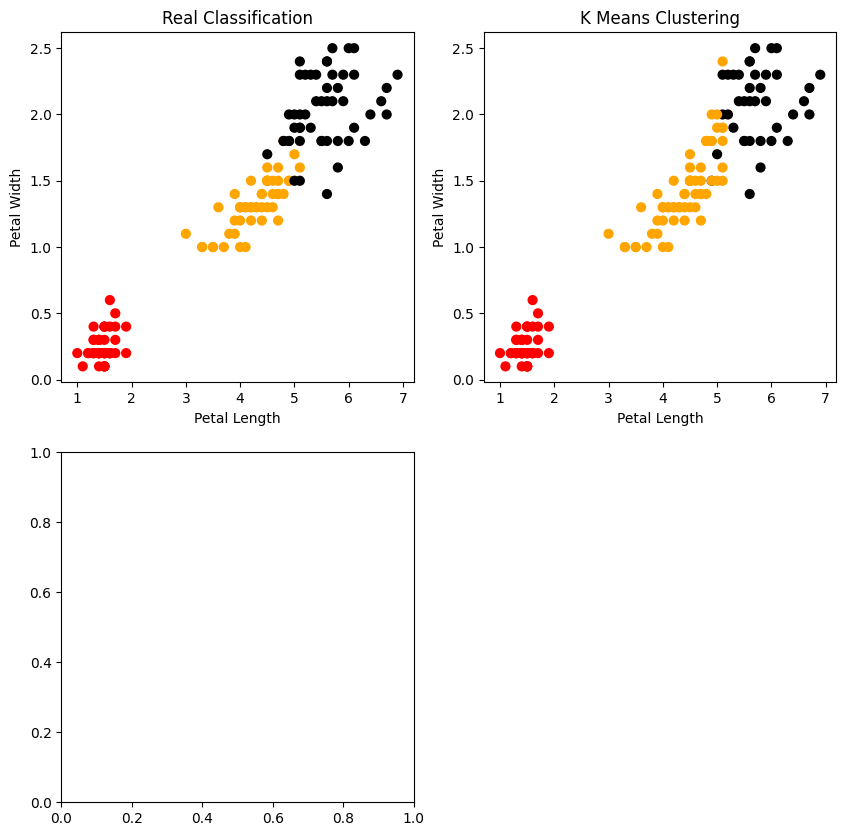

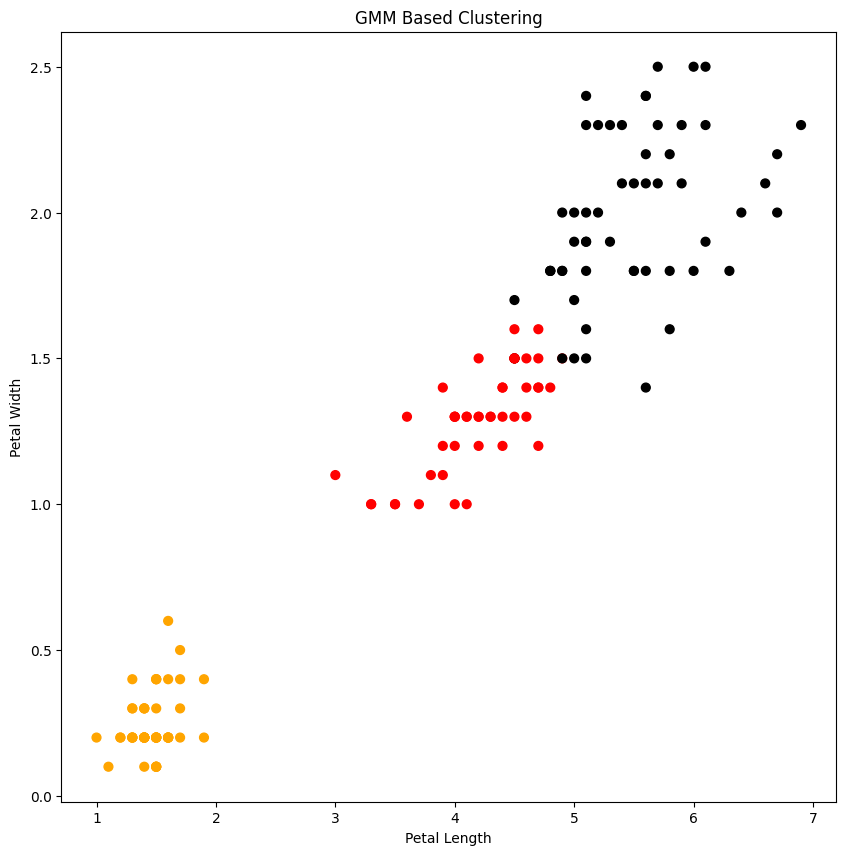

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm
import pandas as pd
import numpy as np


iris_dataset = pd.read_csv('iris.csv')
iris_dataset['Targets'] = iris_dataset.Class.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
x = iris_dataset[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]
y = iris_dataset[['Targets']]



model = KMeans(n_clusters = 3)
model.fit(x)
print('Model Labels:\n',model.labels_)

scaler = preprocessing.StandardScaler()
scaler.fit(x)
xs = scaler.transform(x)
gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)
print('GMM Labels:\n',y_gmm)
plt.figure(figsize = (10,10))
colormap = np.array(['red','orange','black'])
plt.subplot(2,2,1)


plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2,2,2)

plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[model.labels_], s=40)
plt.title('K Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2,2,3)
plt.scatter(x.Petal_Length,x.Petal_Width,c=colormap[y_gmm], s=40)
plt.title('GMM Based Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('Evaluation of K-Means with ground truth classification of Iris Dataset')
print('Rand Index:%f' % sm.adjusted_rand_score(y.Targets, model.labels_))
print('Homogenity Score:%f' % sm.homogeneity_score(y.Targets,model.labels_))
print('Completeness Score:%f' % sm.completeness_score(y.Targets, model.labels_))
print('V-Measure:%f' %sm.v_measure_score(y.Targets,model.labels_))
print('Evaluation of GMM with ground truth classification of Iris dataset')
print('Rand Index:%f ' % sm.adjusted_rand_score(y.Targets, y_gmm))
print('Homogenity Score:%f' % sm.homogeneity_score(y.Targets,y_gmm))
print('Completeness Score:%f' % sm.completeness_score(y.Targets,y_gmm))
print('V-Measure:%f' %sm.v_measure_score(y.Targets,y_gmm))



# New Section

# Program 8

## explanation

## code

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

iris=datasets.load_iris()
print("Iris Data set loaded...")
#print(iris.data)
#print(iris.target)
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.7)
#random_state=0
print("Dataset is split into training and testing samples...")
print("Size of trainng data and its label",x_train.shape,y_train.shape)
print("Size of testing data and its label",x_test.shape, y_test.shape)
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r])," Predicted-label:", str(y_pred[r]))

print("Classification Accuracy :" , classifier.score(x_test,y_test));



Iris Data set loaded...
Dataset is split into training and testing samples...
Size of trainng data and its label (45, 4) (45,)
Size of testing data and its label (105, 4) (105,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [6.  3.4 4.5 1.6]  Actual-label: 1  Predicted-label: 1
 Sample: [5.1 3.8 1.6 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.4 3.4 1.5 0.4]  Actual-label: 0  Predicted-label: 0
 Sample: [6.  2.9 4.5 1.5]  Actual-label: 1  Predicted-label: 1
 Sample: [5.5 4.2 1.4 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [6.8 3.  5.5 2.1]  Actual-label: 2  Predicted-label: 2
 Sample: [5.1 3.5 1.4 0.3]  Actual-label: 0  Predicted-label: 0
 Sample: [5.7 2.5 5.  2. ]  Actual-label: 2  Predicted-label: 2
 Sample: [6.  2.2 4.  1. ]  Actual-label: 1  Predicted-label: 1
 Sample: [5.4 3.7 1.5 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.7 3.  4.2 1.2]  Actual-label: 1  Predicted-label: 1
 Sample: [6.2

# Program 9

## explanation

## code


ypred for k=3


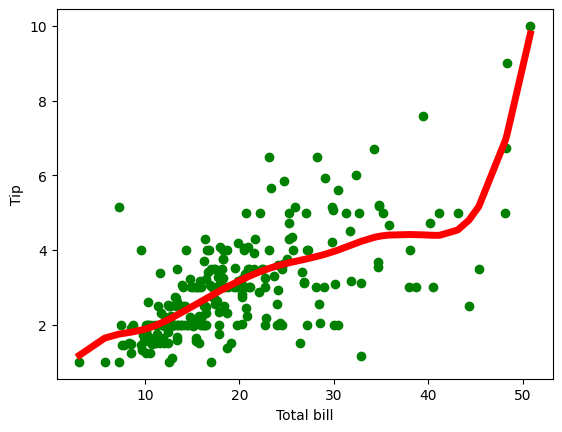


ypred for k=9


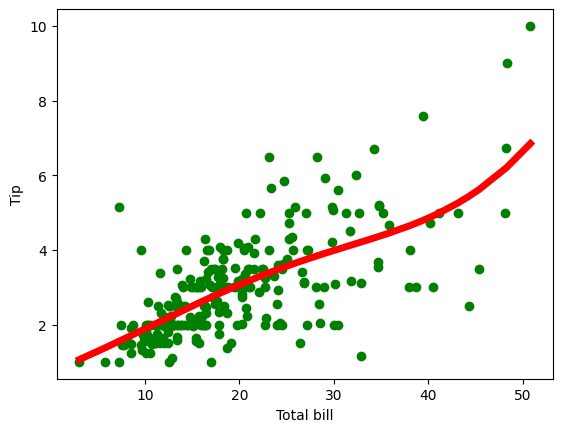

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye((m))) # eye - identity matrix
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff*diff.T/(-2.0*k**2))

    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat, ymat, k):
    m, n = np.shape(xmat)
    # print(m)
    # print(n)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i], xmat, ymat, k)
    return ypred

def graphPlot(X, ypred):
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show()

# load data points
data = pd.read_csv('Tips.csv')
bill = np.array(data.total_bill) # We use only Bill amount and Tips data
#print(bill)
tip = np.array(data.tip)
mbill = np.mat(bill) # .mat will convert nd array is converted in 2D array
mtip = np.mat(tip)
# print(mbill)
m= np.shape(mbill)[1]
# print(m)
one = np.mat(np.ones(m))
# print(one)
X = np.hstack((one.T, mbill.T)) # 244 rows, 2 cols
# print(X)
# Prediction with k=3
print('\nypred for k=3')
ypred = localWeightRegression(X,mtip,3)
graphPlot(X, ypred)
# Prediction with k=9
print('\nypred for k=9')
ypred = localWeightRegression(X, mtip, 9)
graphPlot(X, ypred)



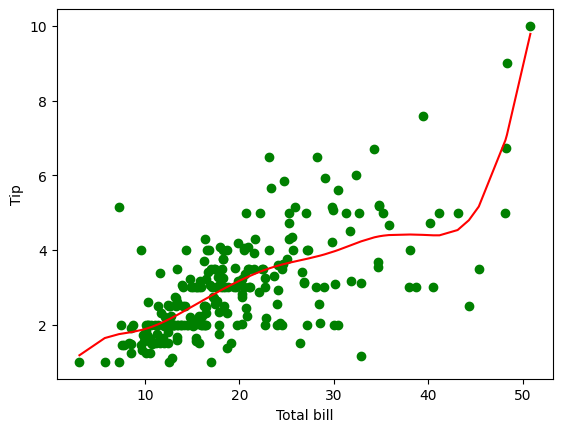

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('Tips.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)

X = np.vstack((np.ones_like(bill), bill)).T
m = len(X)

def localWeight(point, xmat, ymat, k):
    weights = np.diag(np.exp(np.sum((xmat - point) ** 2, axis=1) / (-2.0 * k ** 2)))
    W = np.linalg.inv(xmat.T @ weights @ xmat) @ xmat.T @ weights @ ymat.T
    return W

def localWeightRegression(xmat, ymat, k):
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] @ localWeight(xmat[i], xmat, ymat, k)
    return ypred

ypred = localWeightRegression(X, tip, 3)

sort_indices = X[:, 1].argsort()
x_sorted = X[sort_indices][:, 1]

plt.scatter(bill, tip, color='green')
plt.plot(x_sorted, ypred[sort_indices], color='red')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

# **5th** Program


**5th** Program


In [ ]:
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X / np.amax(X, axis=0)  # maximum of X array longitudinally
y = y / 100


# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)


# Variable initialization
epoch = 7000  # Setting training iterations
lr = 0.1  # Setting learning rate
inputlayer_neurons = 2  # number of features in data set
hiddenlayer_neurons = 3  # number of hidden layers neurons
output_neurons = 1  # number of neurons at output layer
# weight and bias initialization
wh = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
bh = np.random.uniform(size=(1, hiddenlayer_neurons))
wout = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))
# draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    # Forward Propogation
    hinp1 = np.dot(X, wh)
    hinp = hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1 = np.dot(hlayer_act, wout)
    outinp = outinp1 + bout
    output = sigmoid(outinp)
    # Backpropagation
    EO = y - output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) * lr
    wh += X.T.dot(d_hiddenlayer) * lr

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n", output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89504532]
 [0.88003447]
 [0.89406807]]
